# Avaliação Final

NOME: Felipe Maluli de Carvalho Dias


E-MAIL: femcdias@gmail.com

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Esta é a A.F. de Álgebra Linear e Teoria da Informação de 1s2023.



INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material ou IA, mas não qualquer colega ou pessoa humana, presente ou não na prova.
* O envio da prova será fechado às 17h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos. As questões 1, 2, 3 e 4 têm peso igual a 2.5.
* Os conceitos F, E, D, C, B, A serão mapeados para 0, 2, 4, 6, 8 e 10.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


# Exercício 1

A matriz $X$ é:

$$
X = \begin{bmatrix} 1.5 & 0 \\ 2 & 0.5 \end{bmatrix}
$$

O vetor-coluna $v$ é:
$$
v = \begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

$v$ é um auto-vetor de $X$? Justifique sua resposta!

In [15]:
X = np.array([[1.5, 0], [2, 0.5]])
eigenvalues, eigenvectors = np.linalg.eig(X)
print(eigenvectors)

[[0.         0.4472136 ]
 [1.         0.89442719]]


In [19]:
# Sabemos que um autovetor é um vetor que não muda de direção quando multiplicado por uma matriz
# Matriz Original * Autovetor = Autovetor * Lambda
AvezesV = X @ np.array([[1],[1]])
AvezesV

array([[1.5],
       [2.5]])

Não existe Lambda que satisfaça a equação $Xv = v\lambda$, pois $Xv = \begin{bmatrix} 1.5 \\ 2 \end{bmatrix}$ e $\lambda v = \begin{bmatrix} \lambda \\ \lambda \end{bmatrix}$, e não existe $\lambda$ que satisfaça a equação.

# Exercício 2

Um possível modelo para o controle de doenças é o modelo SI (Suscetível - Infectado). Nesse modelo, uma pessoa pode estar ou suscetível ou infectada. Uma pessoa suscetível não tem a doença, mas pode contraí-la a qualquer momento. Uma pessoa infectada tem a doença, mas pode se recuperar.

A cada semana, uma pessoa suscetível tem uma probabilidade de continuar saudável e uma probabilidade de ficar infectada. Da mesma forma, uma pessoa que está infectada tem uma probabilidade de continuar infectada e uma probabilidade de se recuperar, voltando a estar suscetível.

Esse modelo foi aplicado para a doença (fictícia!) algelinite, que faz a pessoa doente ficar azul e cheia de bolinhas amarelas. Uma pessoa com algelininte não consegue trabalhar, nem estudar, nem se divertir. A pessoa com algelinite precisa de um leito de hospital até sua recuperação completa.

Através de pesquisas, cientistas determinaram que:, a cada semana:

* A probabilidade de uma pessoa suscetível se infectar com algelininte é $0.01$ (e, por consequência, a probabilidade de simplesmente continuar suscetível é $0.99$).
* A probabilidade de uma pessoa infectada se recuperar (se estiver num leito hospitalar) é $0.2$ (e, por consequência, a probabilidade de continuar doente é $0.8$).

Na cidade de São Paulo há 10 milhões de pessoas, inicialmente saudáveis. Quantos leitos de hospital são tipicamente necessários para controlar a algelininte na capital paulista ao longo de um tempo longo? Justifique sua resposta!

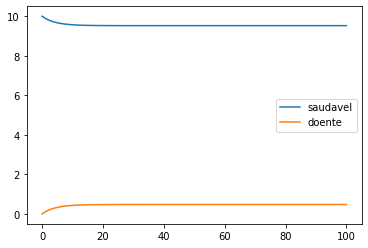

In [76]:
adoecer_vs_melhorar = np.array([[0.99, 0.2], [0.01, 0.8]])
populacao_doente_saudavel = [np.array([10,0])]
for _ in range(100):
    populacao_doente_saudavel.append(adoecer_vs_melhorar @ np.array(populacao_doente_saudavel[-1]).T)

populacao_doente_saudavel = np.array(populacao_doente_saudavel)

plt.plot(populacao_doente_saudavel[:,0], label='saudavel')
plt.plot(populacao_doente_saudavel[:,1], label='doente')
plt.legend()
plt.show()

In [78]:
w,v = np.linalg.eig(adoecer_vs_melhorar)
print(w,'\n',v)

# Autovalor menor que um -> Oscilacao
# Autovalor de 1 -> Ponto de Estabilidade

[1.   0.79] 
 [[ 0.99875234 -0.70710678]
 [ 0.04993762  0.70710678]]


In [79]:
print("Ponto de Estabilidade: ", populacao_doente_saudavel[-1])

Ponto de Estabilidade:  [9.52380952 0.47619048]


In [81]:
print("Leitos Necessarios: ", populacao_doente_saudavel[-1][1] * 1000000)

Leitos Necessarios:  476190.47616290324


Após fazer uma multiplicação matricial da matriz de transformação $T = \begin{bmatrix} 0.99 & 0.2 \\ 0.01 & 0.8 \end{bmatrix}$ por um vetor coluna de populacao em milhões $v = \begin{bmatrix} 10 \\ 0 \end{bmatrix}$ 100 vezes, representando 100 semanas, obtive o vetor coluna $v' = \begin{bmatrix} 9.52380952 \\ 0.47619048 \end{bmatrix}$. Ou seja, após 100 semanas, 476 mil de pessoas estarão infectadas e 9.52380952 milhões de pessoas estarão saudáveis. Como cada pessoa infectada precisa de um leito de hospital, serão necessários 4.46927374 milhões de leitos de hospital para controlar a algelininte na capital paulista ao longo de um tempo longo.

# Exercício 3

Um grupo de cientistas de dados coletou dados sobre os hábitos de estudo de alunos de uma sala de aula do ensino médio. Os dados coletados, para cada aluno, são a sua nota na prova final de Filosofia e o tempo que cada aluno passou estudando.

Os dados do tempo de estudo ($t$) e da nota da na prova ($y$) estão abaixo.

Embora os alunos tenham reclamado que a prova estava difícil, a coordenação da escola argumentou que está claro que, quanto maior o tempo de estudo, maior foi a nota na prova. Ainda, uma das diretrizes da escola diz que as provas são planejadas para que, com 4h de estudo, seja absolutamente factível tirar nota 8 na prova. A coordenção da escola diz que a nota, inclusive, pode ser predita com um modelo linear do tipo $y=at+b$.

Como representante da equipe de ciência de dados:

1. Argumente sobre se o modelo proposto pela coordenação é adequado para prever as notas dos alunos, e, se for o caso, proponha um modelo diferente,
1. Usando `autograd`, encontre os parâmetros do modelo que permite prever a nota com base no tempo de estudo,
1. Mostre uma figura com os pontos medidos sobrepostos a uma linha que evidencie as predições do modelo,
1. Usando os parâmetros do modelo que você escolheu, decida se é factível tirar nota 8 na prova com 4h de estudo.

1.931904352277194 2.068339431079908


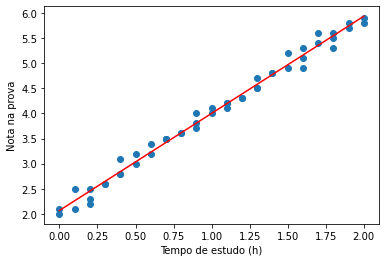

In [89]:
import matplotlib.pyplot as plt
import autograd.numpy as np_
from autograd import grad

def loss( parametros ):
    a, b, x, y_medido = parametros
    yhat = a * x + b
    mse = np_.mean( (yhat - y_medido)**2 )
    return mse

g = grad(loss)

t = np.array([0.0, 0.0, 0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4, 0.4, 0.5, 0.5, 0.6, 0.6, 0.7, 0.7, 0.7, 0.8, 0.8, 0.9, 0.9, 0.9, 1.0, 1.0, 1.1, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.4, 1.4, 1.5, 1.5, 1.6, 1.6, 1.6, 1.7, 1.7, 1.8, 1.8, 1.8, 1.9, 1.9, 2.0, 2.0])
y = np.array([2.0, 2.1, 2.1, 2.5, 2.2, 2.3, 2.5, 2.6, 2.6, 2.8, 2.8, 3.1, 3.0, 3.2, 3.2, 3.4, 3.5, 3.5, 3.5, 3.6, 3.6, 3.7, 4.0, 3.8, 4.0, 4.1, 4.2, 4.2, 4.1, 4.3, 4.3, 4.5, 4.7, 4.5, 4.8, 4.8, 4.9, 5.2, 4.9, 5.1, 5.3, 5.4, 5.6, 5.5, 5.3, 5.6, 5.8, 5.7, 5.8, 5.9])

a = 0.0
b = 0.0

for i in range(1000):
    gradiente = g( (a, b, t, y) )
    a = a - 0.01 * gradiente[0]
    b = b - 0.01 * gradiente[1]

print(a, b)
plt.figure()
plt.scatter(t,y)
plt.plot(t, a * np.array(t) + b, color='red')
plt.xlabel('Tempo de estudo (h)')
plt.ylabel('Nota na prova')
plt.show()

3a ) O modelo de reta se ajusta bem aos dados, portanto sim
3b ) Parametros encontrados -> a = 1.93, b = 2.068339431079908

In [90]:
resultado_4_horas = a * 4 + b
print(resultado_4_horas)

9.795956840188683


3d ) É factível tirar pelo menos nota 8 na prova com 4h de estudo, até uma nota maior como 9.8

# Exercício 4

Após realizar a compressão de uma sequência com o Código de Huffman, obtemos a seguinte árvore:

<img src="arvore.png" />




1. Qual é a codificação da sequência: `ABBCBAAACD`?
1. Qual é a sequência cuja codificação é: `010110111111110100`?

1. 01010110100001110111
2. ABCDDCBA